In [157]:
import os
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn import svm

%matplotlib inline

In [52]:
yourpath = './'
listofFiles = []
for root, dirs, files in os.walk(yourpath, topdown=False):
    for name in files[1:]:        
        print(os.path.join(root, name))
        try:
            listofFiles.append(pd.read_csv(os.path.join(root, name)[2:], sep = '\t', header= None)) 
        except:
            pass

./GSM2494604_Sample_EV_10.Counts.txt.gz
./GSM2494605_Sample_EV_11.Counts.txt.gz
./GSM2494606_Sample_EV_12.Counts.txt.gz
./GSM2494607_Sample_EV_13.Counts.txt.gz
./GSM2494608_Sample_EV_14.Counts.txt.gz
./GSM2494609_Sample_EV_15.Counts.txt.gz
./GSM2494610_Sample_EV_16.Counts.txt.gz
./GSM2494611_Sample_EV_17.Counts.txt.gz
./GSM2494612_Sample_EV_18.Counts.txt.gz
./GSM2494613_Sample_EV_19.Counts.txt.gz
./GSM2494614_Sample_EV_1.Counts.txt.gz
./GSM2494615_Sample_EV_20.Counts.txt.gz
./GSM2494617_Sample_EV_21.Counts.txt.gz
./GSM2494618_Sample_EV_22.Counts.txt.gz
./GSM2494620_Sample_EV_23.Counts.txt.gz
./GSM2494622_Sample_EV_24.Counts.txt.gz
./GSM2494624_Sample_EV_25.Counts.txt.gz
./GSM2494626_Sample_EV_26.Counts.txt.gz
./GSM2494628_Sample_EV_27.Counts.txt.gz
./GSM2494630_Sample_EV_28.Counts.txt.gz
./GSM2494632_Sample_EV_29.Counts.txt.gz
./GSM2494633_Sample_EV_2.Counts.txt.gz
./GSM2494634_Sample_EV_30.Counts.txt.gz
./GSM2494635_Sample_EV_31.Counts.txt.gz
./GSM2494636_Sample_EV_32.Counts.txt.gz
./

In [54]:
files = files[1:]

In [57]:
len(listofFiles)

96

In [59]:
l = [listofFiles[i] for i in range(len(files))]

In [60]:
dt = pd.concat(l, axis=1, ignore_index=True)

In [61]:
def duplicate_columns(df, return_dataframe = False, verbose = False):
    '''
        a function to detect and possibly remove duplicated columns for a pandas dataframe
    '''
    from pandas.core.common import array_equivalent
    # group columns by dtypes, only the columns of the same dtypes can be duplicate of each other
    groups = df.columns.to_series().groupby(df.dtypes).groups
    duplicated_columns = []
 
    for dtype, col_names in groups.items():
        column_values = df[col_names]
        num_columns = len(col_names)
 
        # find duplicated columns by checking pairs of columns, store first column name if duplicate exist 
        for i in range(num_columns):
            column_i = column_values.iloc[:,i].values
            for j in range(i + 1, num_columns):
                column_j = column_values.iloc[:,j].values
                if array_equivalent(column_i, column_j):
                    if verbose: 
                        print("column {} is a duplicate of column {}".format(col_names[i], col_names[j]))
                    duplicated_columns.append(col_names[i])
                    break
    if not return_dataframe:
        # return the column names of those duplicated exists
        return duplicated_columns
    else:
        # return a dataframe with duplicated columns dropped 
        return df.drop(labels = duplicated_columns, axis = 1)

In [62]:
new_df = duplicate_columns(dt, True)

C:\Users\Petr\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: 'pandas.core.common.array_equivalent' is deprecated and is no longer public API


In [63]:
new_df[:10]

,1,3,5,7,9,11,13,15,17,19,...,175,177,179,181,183,185,187,189,190,191
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ENSG00000223972,0
1,0,0,0,0,0,1,0,0,0,1,...,0,3,1,0,0,0,2,0,ENSG00000227232,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ENSG00000243485,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ENSG00000221311,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ENSG00000237613,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ENSG00000268020,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ENSG00000240361,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ENSG00000186092,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ENSG00000238009,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ENSG00000239945,0


In [64]:
new_names = {}

In [65]:
for i, j in zip(new_df.columns[:-2], files[:-1]):
    print(i, j)
    new_names[i] = j

1 GSM2494604_Sample_EV_10.Counts.txt.gz
3 GSM2494605_Sample_EV_11.Counts.txt.gz
5 GSM2494606_Sample_EV_12.Counts.txt.gz
7 GSM2494607_Sample_EV_13.Counts.txt.gz
9 GSM2494608_Sample_EV_14.Counts.txt.gz
11 GSM2494609_Sample_EV_15.Counts.txt.gz
13 GSM2494610_Sample_EV_16.Counts.txt.gz
15 GSM2494611_Sample_EV_17.Counts.txt.gz
17 GSM2494612_Sample_EV_18.Counts.txt.gz
19 GSM2494613_Sample_EV_19.Counts.txt.gz
21 GSM2494614_Sample_EV_1.Counts.txt.gz
23 GSM2494615_Sample_EV_20.Counts.txt.gz
25 GSM2494617_Sample_EV_21.Counts.txt.gz
27 GSM2494618_Sample_EV_22.Counts.txt.gz
29 GSM2494620_Sample_EV_23.Counts.txt.gz
31 GSM2494622_Sample_EV_24.Counts.txt.gz
33 GSM2494624_Sample_EV_25.Counts.txt.gz
35 GSM2494626_Sample_EV_26.Counts.txt.gz
37 GSM2494628_Sample_EV_27.Counts.txt.gz
39 GSM2494630_Sample_EV_28.Counts.txt.gz
41 GSM2494632_Sample_EV_29.Counts.txt.gz
43 GSM2494633_Sample_EV_2.Counts.txt.gz
45 GSM2494634_Sample_EV_30.Counts.txt.gz
47 GSM2494635_Sample_EV_31.Counts.txt.gz
49 GSM2494636_Sample_EV

In [67]:
new_names[190] = 'Gen_ID'

In [68]:
new_names[191] = files[-1]

In [69]:
new_df = new_df.rename(index=str, columns=new_names)

In [72]:
new_df.to_csv('new_table2.csv', header=True, index=False)

In [76]:
df = new_df.T

In [84]:
Gen_ID = df[95:96]

In [86]:
df = df.drop(df.index[95])

In [99]:
target = []
for index in df.index:
    res_ev = re.search('_EV_', index)
    res_oskm = re.search('_OSKM_', index)
    if re.search('_EV_', index) != None:
        target.append(1)
    if re.search('_OSKM_', index) != None:
        target.append(0)

In [212]:
logit = LogisticRegression(penalty='l1')
logit.fit(df, target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [145]:
logit = LogisticRegression(penalty='l1')

In [120]:
import matplotlib.pyplot as plt

In [213]:
logit.coef_[0][762]

0.0

In [126]:
len([x for x in logit.coef_[0] if x != 0])

96

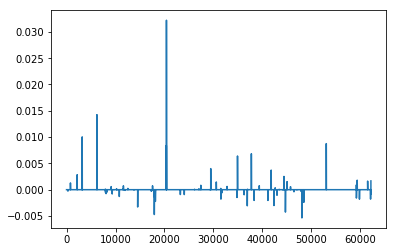

In [129]:
plt.plot(logit.coef_[0])

In [180]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, df, target, cv=8, scoring='f1')

In [182]:
scores.mean()

0.95436507936507931

In [183]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.3, random_state=0)

In [184]:
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [185]:
logit.score(X_test, y_test) 

1.0

In [204]:
df['0'].median()

0.0

In [205]:
good_features = [x for x in df.columns if df[x].median() > 100]

In [218]:
len([logit.coef_[0][int(i)] for i in good_features if logit.coef_[0][int(i)] > 0])

33

In [219]:
good_df = df[good_features]

In [220]:
good_df.shape

(96, 398)

In [221]:
logit = LogisticRegression(penalty='l1')

In [231]:
cross_val_score(logit, good_df, target, cv=25, scoring='f1').mean()

C:\Users\Petr\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Petr\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.87733333333333319

In [233]:
logit.fit(good_df, target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

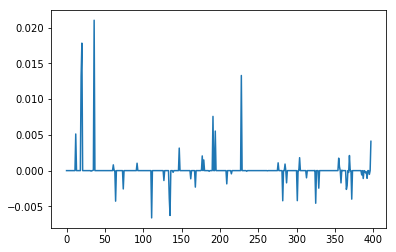

In [236]:
plt.plot(logit.coef_[0])

In [240]:
best_logit_features = [x for x in logit.coef_[0] if x != 0]

In [246]:
best_logit_features_numbers = [list(logit.coef_[0]).index(x) for x in best_logit_features]

In [257]:
Gen_ID['3'][0]

'ENSG00000221311'

In [267]:
best_genes = [Gen_ID[str(x)][0] for x in best_logit_features_numbers]

In [270]:
text_file = open('Output.txt', 'w') 
text_file.write(str(best_genes))

1083

In [265]:
str(best_genes)

"['ENSG00000268903', 'ENSG00000241670', 'ENSG00000237094', 'ENSG00000235146', 'ENSG00000223659', 'ENSG00000225972', 'ENSG00000269308', 'ENSG00000223764', 'ENSG00000187608', 'ENSG00000160087', 'ENSG00000230270', 'ENSG00000248333', 'ENSG00000227775', 'ENSG00000215790', 'ENSG00000169885', 'ENSG00000162585', 'ENSG00000229393', 'ENSG00000228037', 'ENSG00000177133', 'ENSG00000256761', 'ENSG00000226286', 'ENSG00000078900', 'ENSG00000235169', 'ENSG00000116198', 'ENSG00000236948', 'ENSG00000268332', 'ENSG00000231868', 'ENSG00000204859', 'ENSG00000200975', 'ENSG00000228423', 'ENSG00000238249', 'ENSG00000131686', 'ENSG00000197241', 'ENSG00000180758', 'ENSG00000188807', 'ENSG00000233268', 'ENSG00000202415', 'ENSG00000199562', 'ENSG00000264501', 'ENSG00000175279', 'ENSG00000238199', 'ENSG00000224338', 'ENSG00000235643', 'ENSG00000116661', 'ENSG00000215910', 'ENSG00000177553', 'ENSG00000011021', 'ENSG00000236997', 'ENSG00000120937', 'ENSG00000028137', 'ENSG00000225196', 'ENSG00000048707', 'ENSG00000